<a href="https://colab.research.google.com/github/Shrushti-2002/PRODIGY_DS_task05/blob/main/task_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 05:- Analyze traffic accident data to identify patterns related to road conditions, weather and time of day. visualize accident hotspots and contributing factors.

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
# Load the dataset
accidents_data = pd.read_csv('traffic_accidents_data.csv')

In [53]:
accidents_data.head()

,Date,Time,Latitude,Longitude,Location Description,Weather Conditions,Road Conditions,Visibility,Accident Type,Injury Severity,Contributing Factors,Vehicle Type,No of Vehichles,Vehicle Speed,Day of Week,Month,Year
0,05-01-2022,15:30:00,40.7128,-74.0060,Highway,Foggy,Wet,Poor,Collision,Moderate,Speeding,Truck,1,45,Wednesday,January,2022
1,10-02-2022,18:45:00,41.8781,-87.6298,Street,Rainy,Wet,Poor,Rollover,Severe,Drunk Driving,Motorcycle,1,40,Thursday,February,2022
2,15-03-2022,12:00:00,37.7749,-122.4194,Intersection,Clear,Dry,Clear,Collision,Moderate,Weather,Car,2,25,Tuesday,March,2022
3,20-04-2022,09:20:00,34.0522,-118.2437,Highway,Clear,Dry,Clear,Collision,Minor,Other,Car,2,35,Wednesday,April,2022
4,25-05-2022,17:10:00,40.7128,-74.0060,Street,Rainy,Wet,Poor,Collision,Severe,Speeding,Car,1,50,Wednesday,May,2022


In [54]:
accidents_data.shape

(147, 17)

In [55]:
accidents_data.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Location Description',
       'Weather Conditions', 'Road Conditions', 'Visibility', 'Accident Type',
       'Injury Severity', 'Contributing Factors', 'Vehicle Type',
       'No of Vehichles', 'Vehicle Speed', 'Day of Week', 'Month', 'Year'],
      dtype='object')

In [56]:
accidents_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  147 non-null    object 
 1   Time                  147 non-null    object 
 2   Latitude              147 non-null    float64
 3   Longitude             147 non-null    float64
 4   Location Description  147 non-null    object 
 5   Weather Conditions    147 non-null    object 
 6   Road Conditions       147 non-null    object 
 7   Visibility            147 non-null    object 
 8   Accident Type         147 non-null    object 
 9   Injury Severity       147 non-null    object 
 10  Contributing Factors  147 non-null    object 
 11  Vehicle Type          147 non-null    object 
 12  No of Vehichles       147 non-null    int64  
 13  Vehicle Speed         147 non-null    int64  
 14  Day of Week           147 non-null    object 
 15  Month                 1

In [57]:
accidents_data.dtypes

Date                     object
Time                     object
Latitude                float64
Longitude               float64
Location Description     object
Weather Conditions       object
Road Conditions          object
Visibility               object
Accident Type            object
Injury Severity          object
Contributing Factors     object
Vehicle Type             object
No of Vehichles           int64
Vehicle Speed             int64
Day of Week              object
Month                    object
Year                      int64
dtype: object

In [58]:
accidents_data.describe()

,Latitude,Longitude,No of Vehichles,Vehicle Speed,Year
count,147.000000,147.000000,147.000000,147.000000,147.000000
mean,38.325525,-98.649265,1.428571,38.843537,2022.979592
std,3.197276,20.962406,0.496564,8.110285,0.823203
min,34.052200,-122.419400,1.000000,25.000000,2022.000000
25%,34.052200,-118.243700,1.000000,30.000000,2022.000000
50%,40.712800,-87.629800,1.000000,35.000000,2023.000000
75%,40.712800,-74.006000,2.000000,45.000000,2024.000000
max,41.878100,-74.006000,2.000000,55.000000,2024.000000


In [59]:
# Step 1: Handling Missing Values
accidents_data.isnull().sum()

Date                    0
Time                    0
Latitude                0
Longitude               0
Location Description    0
Weather Conditions      0
Road Conditions         0
Visibility              0
Accident Type           0
Injury Severity         0
Contributing Factors    0
Vehicle Type            0
No of Vehichles         0
Vehicle Speed           0
Day of Week             0
Month                   0
Year                    0
dtype: int64

In [60]:
# Step 2: Handling Duplicates
# Drop duplicate rows
accidents_data.drop_duplicates(inplace=True)

In [61]:
# Convert 'Date' and 'Time' columns to datetime format
accidents_data['DateTime'] = pd.to_datetime(accidents_data['Date'] + ' ' + accidents_data['Time'])

# Set 'DateTime' as the index
accidents_data.set_index('DateTime', inplace=True)

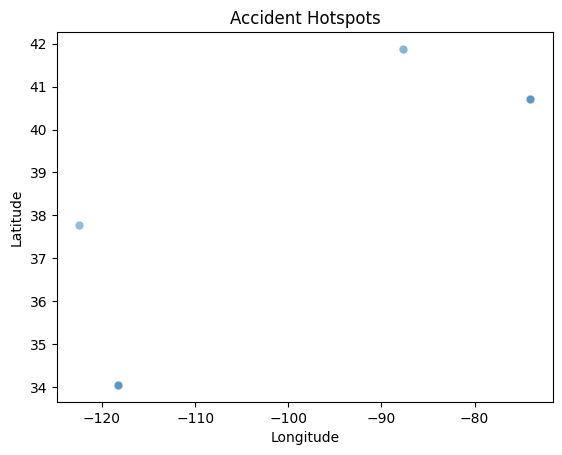

In [62]:
# Accident Hotspots (Location)
sns.scatterplot(x='Longitude', y='Latitude', data=accidents_data, alpha=0.1)
plt.title('Accident Hotspots')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

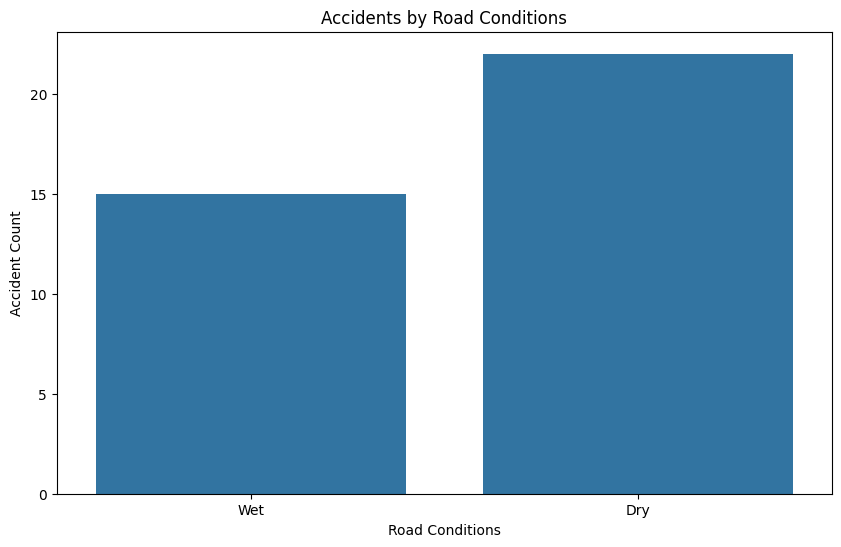

In [63]:
# Road Conditions vs. Accident Count
plt.figure(figsize=(10, 6))
sns.countplot(x='Road Conditions', data=accidents_data)
plt.title('Accidents by Road Conditions')
plt.xlabel('Road Conditions')
plt.ylabel('Accident Count')
plt.show()

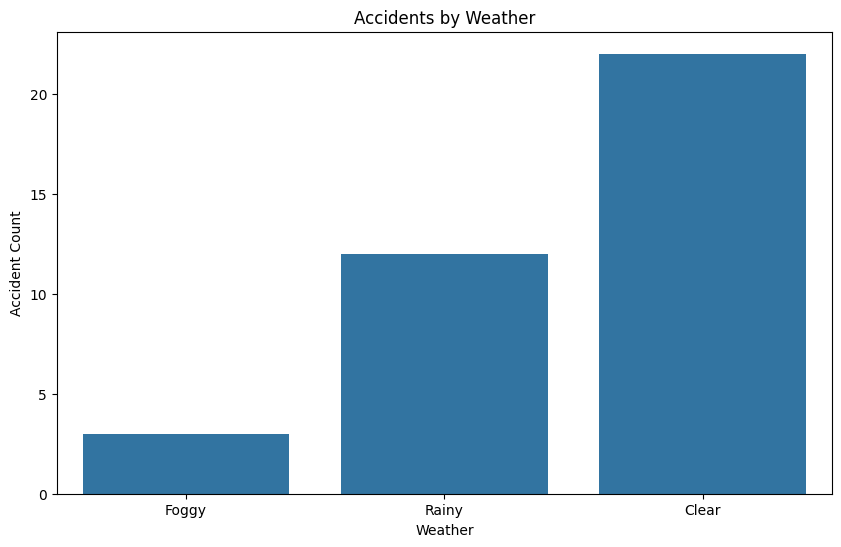

In [64]:
# Weather vs. Accident Count
plt.figure(figsize=(10, 6))
sns.countplot(x='Weather Conditions', data=accidents_data)
plt.title('Accidents by Weather')
plt.xlabel('Weather')
plt.ylabel('Accident Count')
plt.show()

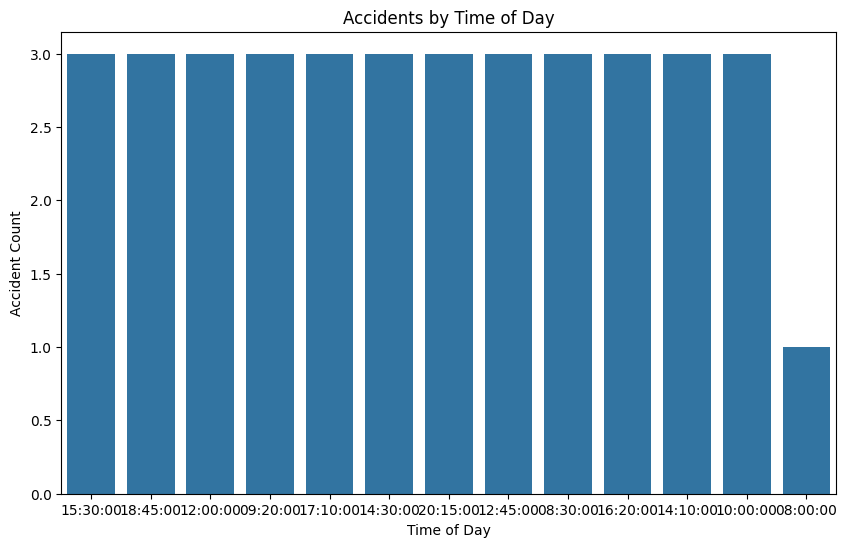

In [65]:
# Time of Day vs. Accident Count
plt.figure(figsize=(10, 6))
sns.countplot(x='Time', data=accidents_data)
plt.title('Accidents by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Accident Count')
plt.show()

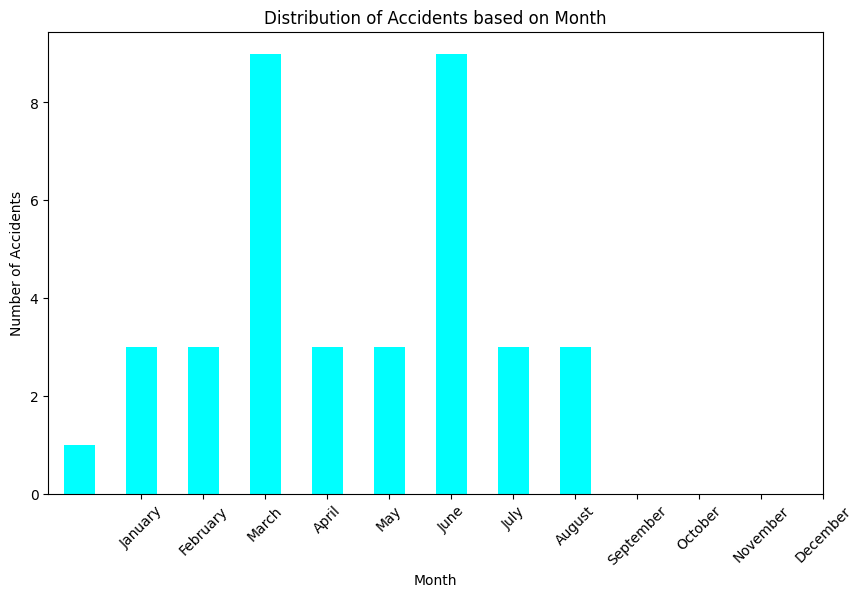

In [66]:
# Distribution of accidents based on month
plt.figure(figsize=(10, 6))
accidents_data.index.month.value_counts().sort_index().plot(kind='bar',color="cyan")
plt.title('Distribution of Accidents based on Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(range(1, 13), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=45)
plt.show()

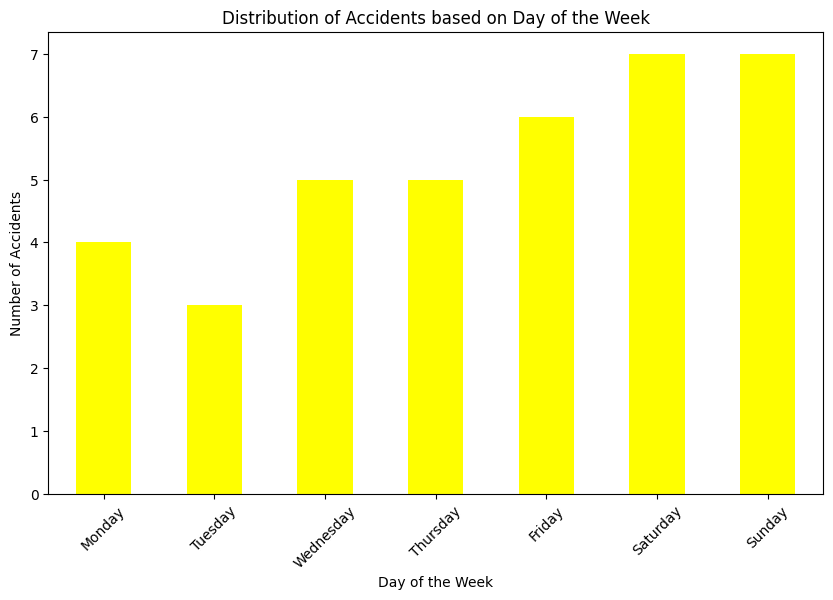

In [68]:
plt.figure(figsize=(10, 6))
accidents_data.index.dayofweek.value_counts().sort_index().plot(kind='bar',color = "yellow")
plt.title('Distribution of Accidents based on Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
plt.show()